In [1]:
import torch # for pytorch
import torch.nn as nn # for neural network
import torch.nn.functional as F # 활성화 함수 손실 함수
import torch.optim as optim
from torch.utils.data import DataLoader 

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.cuda.get_device_name(0))

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
device

True
1.11.0
NVIDIA GeForce GTX 1050


device(type='cuda')

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
roots = 'C:/Users/chica/OneDrive/바탕 화면/it관련/data'#/cifar-10-batches-py'

In [5]:
trainset = torchvision.datasets.CIFAR10(root=roots, train=True,
                                        download=False, transform=transform)
testset = torchvision.datasets.CIFAR10(root=roots, train=False,
                                       download=False, transform=transform)

In [6]:
batch_size = 4

trainloader = DataLoader(trainset,
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=2)
testloader = DataLoader(testset,
                         batch_size=batch_size,
                         shuffle=False,
                         num_workers=2)

In [7]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

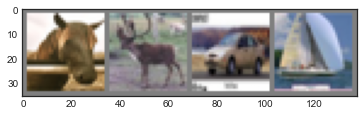

horse deer  automobile ship 


In [8]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0

print('Fin')